# Libraries

In [1]:
# Basic
import pandas as pd
import numpy as np
import os
from platform import python_version

# mlflow
import mlflow
from urllib.parse import urlparse
import mlflow.sklearn
import mlflow.xgboost
from random import random, randint
from mlflow import log_metric, log_param, log_artifacts

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mso

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Model selection
from sklearn.model_selection import train_test_split

# Auto ML
#from tpot import TPOTClassifier

# Modeling
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Feature importance (XGBoost)
from xgboost import plot_importance

# Report
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, \
    confusion_matrix, classification_report

# Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.svm import SVC

# Pipeline
from imblearn.pipeline import Pipeline
#preprocessing pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#import warnings
#warnings.filterwarnings("ignore")

# Database & Preprocessing

In [2]:
df = pd.read_csv("data/bquxjob_4a55ecd5_184c3af4fbe.csv")
df

,fullVisitorId,bounces,time_on_site,will_buy_on_return_visit,pageviews,medium,channelGrouping,deviceCategory,country,date
0,5777438125314310020,0,12884,0,169.0,organic,Organic Search,desktop,United States,20220919
1,5777438125314310020,0,12884,0,1.0,organic,Organic Search,desktop,United States,20220919
2,5777438125314310020,0,12884,0,8.0,organic,Organic Search,desktop,United States,20220919
3,5777438125314310020,0,12884,1,178.0,organic,Organic Search,desktop,United States,20220919
4,7209403264301039802,0,8793,0,1.0,(none),Direct,desktop,United States,20220928
...,...,...,...,...,...,...,...,...,...,...
48049,4362490200806308515,1,0,0,1.0,(none),Direct,desktop,(not set),20220924
48050,6737381346243471980,1,0,0,1.0,(none),Direct,desktop,(not set),20220924
48051,3763043934585916260,1,0,0,1.0,(none),Direct,desktop,(not set),20220924
48052,1512694728925216829,1,0,0,1.0,(none),Direct,desktop,United States,20220926


In [3]:
df = df.set_index('fullVisitorId')
df

,bounces,time_on_site,will_buy_on_return_visit,pageviews,medium,channelGrouping,deviceCategory,country,date
fullVisitorId,,,,,,,,,
5777438125314310020,0,12884,0,169.0,organic,Organic Search,desktop,United States,20220919
5777438125314310020,0,12884,0,1.0,organic,Organic Search,desktop,United States,20220919
5777438125314310020,0,12884,0,8.0,organic,Organic Search,desktop,United States,20220919
5777438125314310020,0,12884,1,178.0,organic,Organic Search,desktop,United States,20220919
7209403264301039802,0,8793,0,1.0,(none),Direct,desktop,United States,20220928
...,...,...,...,...,...,...,...,...,...
4362490200806308515,1,0,0,1.0,(none),Direct,desktop,(not set),20220924
6737381346243471980,1,0,0,1.0,(none),Direct,desktop,(not set),20220924
3763043934585916260,1,0,0,1.0,(none),Direct,desktop,(not set),20220924


In [4]:
df_best = df.drop(['medium','date','country'], axis= 1)
df_best

,bounces,time_on_site,will_buy_on_return_visit,pageviews,channelGrouping,deviceCategory
fullVisitorId,,,,,,
5777438125314310020,0,12884,0,169.0,Organic Search,desktop
5777438125314310020,0,12884,0,1.0,Organic Search,desktop
5777438125314310020,0,12884,0,8.0,Organic Search,desktop
5777438125314310020,0,12884,1,178.0,Organic Search,desktop
7209403264301039802,0,8793,0,1.0,Direct,desktop
...,...,...,...,...,...,...
4362490200806308515,1,0,0,1.0,Direct,desktop
6737381346243471980,1,0,0,1.0,Direct,desktop
3763043934585916260,1,0,0,1.0,Direct,desktop


In [5]:
df_categ = df_best.copy()

In [9]:
categorial = df_categ[["channelGrouping","deviceCategory"]]

for i in categorial.columns:
    df_categ[i]= LabelEncoder().fit_transform(df_categ[i])
    df_categ[i].unique()
    
categorial

,channelGrouping,deviceCategory
fullVisitorId,,
5777438125314310020,4,0
5777438125314310020,4,0
5777438125314310020,4,0
5777438125314310020,4,0
7209403264301039802,1,0
...,...,...
4362490200806308515,1,0
6737381346243471980,1,0
3763043934585916260,1,0


In [11]:
df_model = df_categ.copy().dropna(axis=0)

In [14]:
df_model.rename(columns = {'will_buy_on_return_visit':'target'}, inplace = True)

In [16]:
X = df_model.drop('target', axis=1)
y = df_model['target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.75)
steps = [('over', over), ('under', under)]
pipeline_smote = Pipeline(steps=steps)

In [21]:
df_resample_X , df_resample_y = pipeline_smote.fit_resample(X_train, y_train)

In [23]:
df_resample_y.value_counts()

0    8160
1    6120
Name: target, dtype: int64

# MLflow

In [26]:
# test unitaire _ metrics

def eval_metrics(actual,pred):
    accuracy = round(accuracy_score(actual,pred),2)
    precision= round(precision_score(actual,pred),2)
    recall = round(recall_score(actual,pred),2)
    f1 = round(f1_score(actual,pred),2)
    return accuracy,precision,recall,f1

def test_eval_metrics():
    ac = [0,1,1,0,0,1]  
    pr = [1,1,1,0,1,1]
    pr_accuracy,pr_precision,pr_recall,pr_f1 = eval_metrics(ac,pr)
    true_acc = 0.67
    true_pre = 0.6
    true_rec = 1.0
    true_f1 = 0.75
    assert((pr_accuracy == true_acc) & (pr_precision == true_pre) & (pr_recall == true_rec) & (pr_f1==true_f1))

test_eval_metrics()

[17:02:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "randdom_state" } are not used.

[0]	validation_0-logloss:0.69157	validation_1-logloss:0.69149
[1]	validation_0-logloss:0.69000	validation_1-logloss:0.68984
[2]	validation_0-logloss:0.68845	validation_1-logloss:0.68820
[3]	validation_0-logloss:0.68690	validation_1-logloss:0.68657
[4]	validation_0-logloss:0.68536	validation_1-logloss:0.68495
[5]	validation_0-logloss:0.68383	validation_1-logloss:0.68335
[6]	validation_0-logloss:0.68231	validation_1-logloss:0.68175
[7]	validation_0-logloss:0.68079	validation_1-logloss:0.68016
[8]	validation_0-logloss:0.67929	validation_1-logloss:0.67858
[9]	validation_0-logloss:0.67780	validation_1-logloss:0.67701
[10]	validation_0-logloss:0.67631	validation_1-logloss:0.67546
[11]	validation_0-logloss:0.67483	validation_1-logloss:0.67391
[12]	validation_0-logloss:0.67336	validation_1-logl

[127]	validation_0-logloss:0.54803	validation_1-logloss:0.54374
[128]	validation_0-logloss:0.54724	validation_1-logloss:0.54294
[129]	validation_0-logloss:0.54643	validation_1-logloss:0.54213
[130]	validation_0-logloss:0.54565	validation_1-logloss:0.54134
[131]	validation_0-logloss:0.54486	validation_1-logloss:0.54056
[132]	validation_0-logloss:0.54409	validation_1-logloss:0.53977
[133]	validation_0-logloss:0.54332	validation_1-logloss:0.53900
[134]	validation_0-logloss:0.54253	validation_1-logloss:0.53820
[135]	validation_0-logloss:0.54177	validation_1-logloss:0.53744
[136]	validation_0-logloss:0.54101	validation_1-logloss:0.53667
[137]	validation_0-logloss:0.54026	validation_1-logloss:0.53591
[138]	validation_0-logloss:0.53950	validation_1-logloss:0.53516
[139]	validation_0-logloss:0.53876	validation_1-logloss:0.53441
[140]	validation_0-logloss:0.53799	validation_1-logloss:0.53363
[141]	validation_0-logloss:0.53725	validation_1-logloss:0.53289
[142]	validation_0-logloss:0.53651	valid

[256]	validation_0-logloss:0.47113	validation_1-logloss:0.46738
[257]	validation_0-logloss:0.47070	validation_1-logloss:0.46696
[258]	validation_0-logloss:0.47026	validation_1-logloss:0.46653
[259]	validation_0-logloss:0.46982	validation_1-logloss:0.46610
[260]	validation_0-logloss:0.46938	validation_1-logloss:0.46568
[261]	validation_0-logloss:0.46895	validation_1-logloss:0.46526
[262]	validation_0-logloss:0.46852	validation_1-logloss:0.46484
[263]	validation_0-logloss:0.46808	validation_1-logloss:0.46442
[264]	validation_0-logloss:0.46766	validation_1-logloss:0.46401
[265]	validation_0-logloss:0.46723	validation_1-logloss:0.46359
[266]	validation_0-logloss:0.46681	validation_1-logloss:0.46318
[267]	validation_0-logloss:0.46638	validation_1-logloss:0.46277
[268]	validation_0-logloss:0.46596	validation_1-logloss:0.46236
[269]	validation_0-logloss:0.46554	validation_1-logloss:0.46196
[270]	validation_0-logloss:0.46513	validation_1-logloss:0.46155
[271]	validation_0-logloss:0.46471	valid

[385]	validation_0-logloss:0.42584	validation_1-logloss:0.42456
[386]	validation_0-logloss:0.42557	validation_1-logloss:0.42431
[387]	validation_0-logloss:0.42530	validation_1-logloss:0.42406
[388]	validation_0-logloss:0.42503	validation_1-logloss:0.42381
[389]	validation_0-logloss:0.42476	validation_1-logloss:0.42356
[390]	validation_0-logloss:0.42448	validation_1-logloss:0.42331
[391]	validation_0-logloss:0.42422	validation_1-logloss:0.42307
[392]	validation_0-logloss:0.42394	validation_1-logloss:0.42282
[393]	validation_0-logloss:0.42368	validation_1-logloss:0.42258
[394]	validation_0-logloss:0.42342	validation_1-logloss:0.42233
[395]	validation_0-logloss:0.42315	validation_1-logloss:0.42209
[396]	validation_0-logloss:0.42290	validation_1-logloss:0.42185
[397]	validation_0-logloss:0.42261	validation_1-logloss:0.42159
[398]	validation_0-logloss:0.42236	validation_1-logloss:0.42135
[399]	validation_0-logloss:0.42210	validation_1-logloss:0.42112
[400]	validation_0-logloss:0.42182	valid

[514]	validation_0-logloss:0.39724	validation_1-logloss:0.39788
[515]	validation_0-logloss:0.39706	validation_1-logloss:0.39772
[516]	validation_0-logloss:0.39689	validation_1-logloss:0.39757
[517]	validation_0-logloss:0.39673	validation_1-logloss:0.39741
[518]	validation_0-logloss:0.39656	validation_1-logloss:0.39726
[519]	validation_0-logloss:0.39639	validation_1-logloss:0.39710
[520]	validation_0-logloss:0.39622	validation_1-logloss:0.39694
[521]	validation_0-logloss:0.39606	validation_1-logloss:0.39679
[522]	validation_0-logloss:0.39590	validation_1-logloss:0.39664
[523]	validation_0-logloss:0.39573	validation_1-logloss:0.39648
[524]	validation_0-logloss:0.39557	validation_1-logloss:0.39633
[525]	validation_0-logloss:0.39540	validation_1-logloss:0.39617
[526]	validation_0-logloss:0.39524	validation_1-logloss:0.39603
[527]	validation_0-logloss:0.39507	validation_1-logloss:0.39587
[528]	validation_0-logloss:0.39491	validation_1-logloss:0.39573
[529]	validation_0-logloss:0.39476	valid

[643]	validation_0-logloss:0.37878	validation_1-logloss:0.38111
[644]	validation_0-logloss:0.37866	validation_1-logloss:0.38102
[645]	validation_0-logloss:0.37855	validation_1-logloss:0.38091
[646]	validation_0-logloss:0.37845	validation_1-logloss:0.38082
[647]	validation_0-logloss:0.37834	validation_1-logloss:0.38073
[648]	validation_0-logloss:0.37822	validation_1-logloss:0.38063
[649]	validation_0-logloss:0.37812	validation_1-logloss:0.38054
[650]	validation_0-logloss:0.37801	validation_1-logloss:0.38045
[651]	validation_0-logloss:0.37790	validation_1-logloss:0.38035
[652]	validation_0-logloss:0.37779	validation_1-logloss:0.38026
[653]	validation_0-logloss:0.37769	validation_1-logloss:0.38016
[654]	validation_0-logloss:0.37758	validation_1-logloss:0.38007
[655]	validation_0-logloss:0.37748	validation_1-logloss:0.37998
[656]	validation_0-logloss:0.37737	validation_1-logloss:0.37988
[657]	validation_0-logloss:0.37726	validation_1-logloss:0.37979
[658]	validation_0-logloss:0.37715	valid

[771]	validation_0-logloss:0.36609	validation_1-logloss:0.36982
[772]	validation_0-logloss:0.36599	validation_1-logloss:0.36973
[773]	validation_0-logloss:0.36589	validation_1-logloss:0.36963
[774]	validation_0-logloss:0.36581	validation_1-logloss:0.36956
[775]	validation_0-logloss:0.36571	validation_1-logloss:0.36946
[776]	validation_0-logloss:0.36563	validation_1-logloss:0.36939
[777]	validation_0-logloss:0.36555	validation_1-logloss:0.36932
[778]	validation_0-logloss:0.36547	validation_1-logloss:0.36925
[779]	validation_0-logloss:0.36538	validation_1-logloss:0.36918
[780]	validation_0-logloss:0.36530	validation_1-logloss:0.36911
[781]	validation_0-logloss:0.36522	validation_1-logloss:0.36904
[782]	validation_0-logloss:0.36514	validation_1-logloss:0.36897
[783]	validation_0-logloss:0.36506	validation_1-logloss:0.36890
[784]	validation_0-logloss:0.36499	validation_1-logloss:0.36883
[785]	validation_0-logloss:0.36491	validation_1-logloss:0.36876
[786]	validation_0-logloss:0.36483	valid

[900]	validation_0-logloss:0.35680	validation_1-logloss:0.36184
[901]	validation_0-logloss:0.35675	validation_1-logloss:0.36179
[902]	validation_0-logloss:0.35669	validation_1-logloss:0.36174
[903]	validation_0-logloss:0.35664	validation_1-logloss:0.36169
[904]	validation_0-logloss:0.35657	validation_1-logloss:0.36163
[905]	validation_0-logloss:0.35650	validation_1-logloss:0.36157
[906]	validation_0-logloss:0.35643	validation_1-logloss:0.36152
[907]	validation_0-logloss:0.35636	validation_1-logloss:0.36146
[908]	validation_0-logloss:0.35630	validation_1-logloss:0.36141
[909]	validation_0-logloss:0.35624	validation_1-logloss:0.36135
[910]	validation_0-logloss:0.35618	validation_1-logloss:0.36131
[911]	validation_0-logloss:0.35612	validation_1-logloss:0.36126
[912]	validation_0-logloss:0.35605	validation_1-logloss:0.36120
[913]	validation_0-logloss:0.35599	validation_1-logloss:0.36115
[914]	validation_0-logloss:0.35592	validation_1-logloss:0.36109
[915]	validation_0-logloss:0.35585	valid

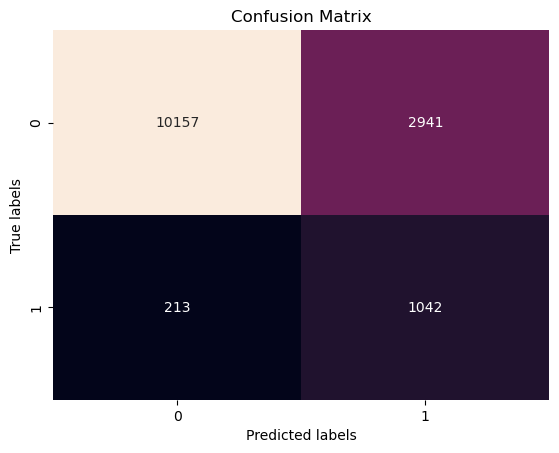

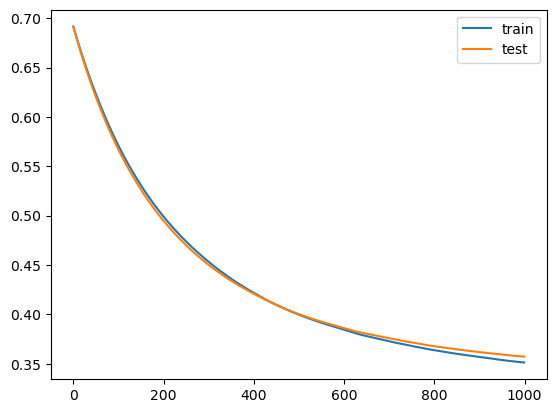

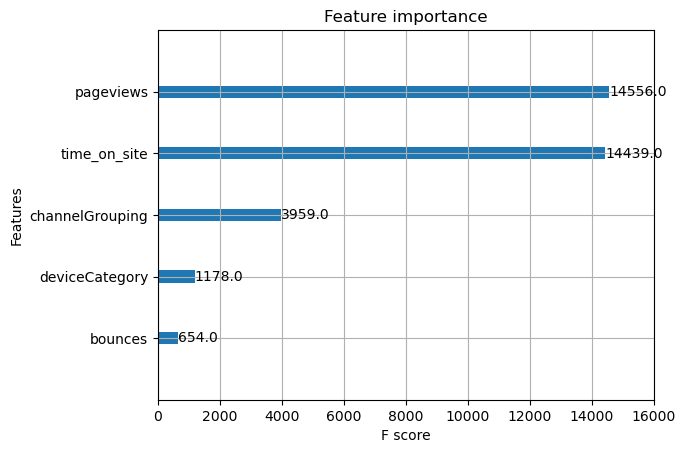

Successfully registered model 'xgboost_model_withoutCountry'.
2023/01/15 17:03:10 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: xgboost_model_withoutCountry, version 1
Created version '1' of model 'xgboost_model_withoutCountry'.


In [31]:
params_xgboost = {'alpha': 1e-05,
                  'gamma': 0.2,
                  'learning_rate': 0.003,
                  'max_depth': 6,
                  'n_estimators': 1000,
                  'randdom_state': 42
                 }

evalset = [(df_resample_X, df_resample_y),(X_test,y_test)]

try:
    existing_exp = mlflow.get_experiment_by_name('Training_experiment')
    id_exp = existing_exp.experiment_id
except:
    id_exp = mlflow.create_experiment(name = "Training_experiment")
    
    
with mlflow.start_run(experiment_id=id_exp,run_name="XGBoost_without_country"):
        xgb = XGBClassifier(**params_xgboost)
        xgb.fit(df_resample_X, df_resample_y,eval_set=evalset)

        predicted = xgb.predict(X_test)

        acc,prec,rec,f1 = eval_metrics(y_test, predicted)

        print("  Accuracy: %s" % acc)
        print("  Precision: %s" % prec)
        print("  Recall: %s" % rec)
        print("  F1 score: %s" % f1)

        #mlflow.log_param("criterion", rfc.criterion)
        #mlflow.log_param("N estimator", rfc.get_params()["n_estimators"])
        mlflow.log_params(xgb.get_params())
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Precision", prec)
        mlflow.log_metric("Recall", rec)
        mlflow.log_metric("F1 score", f1)
        
        ax = plt.subplot()
        sns.heatmap(confusion_matrix(y_test,predicted),annot=True,cbar=False,fmt="g")
        plt.title("Confusion Matrix")
        ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
        plt.savefig("confusion_matrix.png")
        mlflow.log_artifact("confusion_matrix.png")
        plt.show()
        
        plt.plot(xgb.evals_result_['validation_0']['logloss'], label='train')
        plt.plot(xgb.evals_result_['validation_1']['logloss'], label='test')
        # show the legend
        plt.legend()
        # show the plot
        plt.savefig("lc.png")
        mlflow.log_artifact("lc.png")
        plt.show()
        
        plot_importance(xgb)
        plt.savefig("feature_importance.png")
        mlflow.log_artifact("feature_importance.png")
        plt.show()

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":

            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
            mlflow.xgboost.log_model(xgb, "model_xgboost", registered_model_name="model_xgboost")
        else:
            mlflow.xgboost.log_model(xgb, "model_xgboost",
                                     registered_model_name="xgboost_model_withoutCountry",
                                     model_format="booster")
        mlflow.end_run()

In [28]:
def test_precision(y_true,y_predict,description, viz = True):
  """Function to calculate the recall and precision score for a classes"""
  if viz == True:
    sns.heatmap(confusion_matrix(y_true,y_predict),annot= True, cbar=False)
    plt.title(description)
    print('Precision score : '+ str(precision_score(y_true,y_predict)))
    print('Recall_score : '+str(recall_score(y_true,y_predict)))
    
  precision = precision_score(y_true,y_predict)
  recall = recall_score(y_true,y_predict)
  
  return precision, recall 

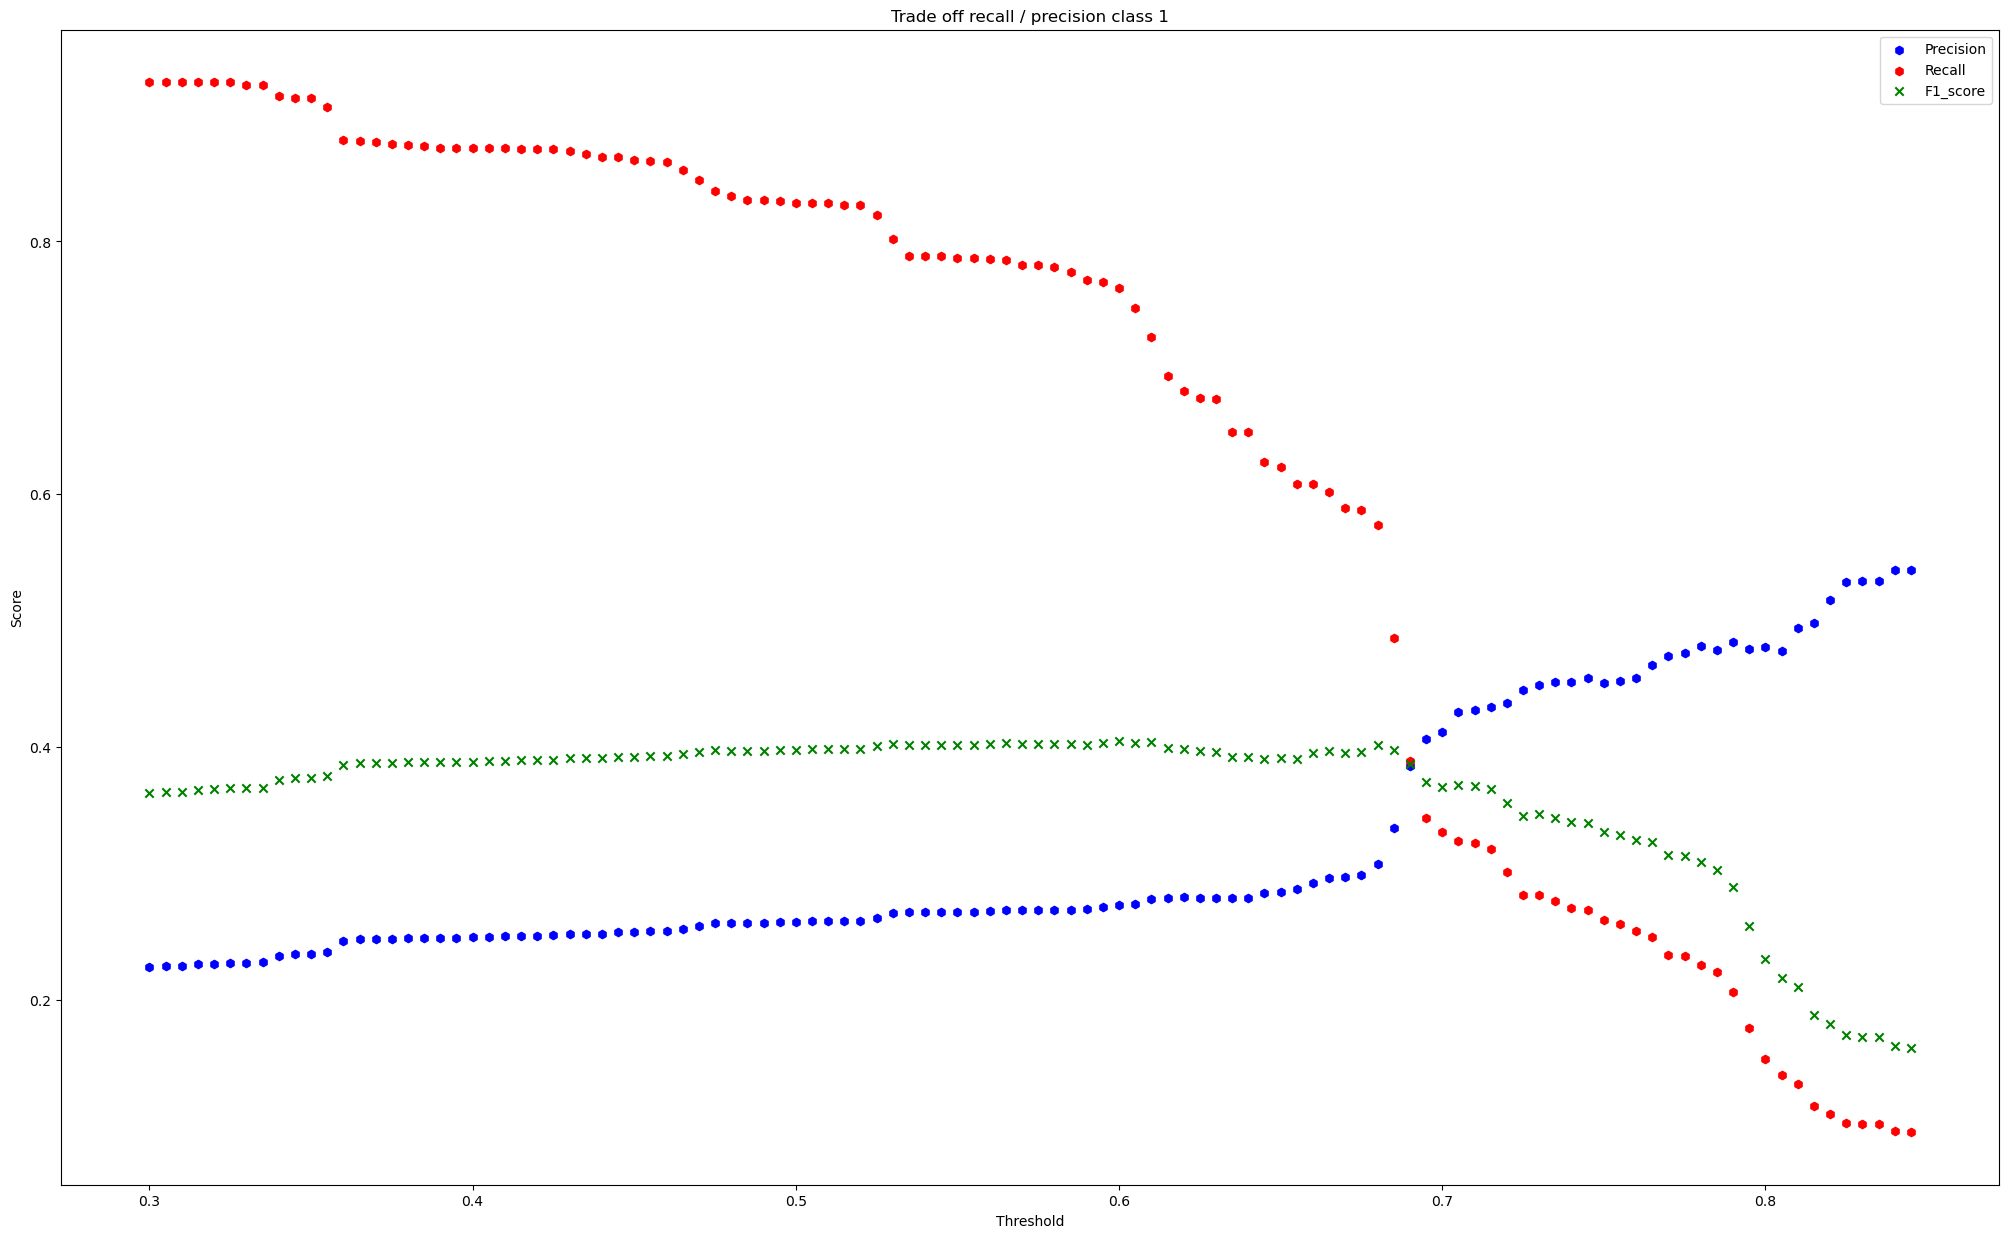

In [29]:
# #Just one time
X_test_df = X_test.copy()
X_test_df["proba_1"] = xgb.predict_proba(X_test)[:,1]
X_test_df["true"] = y_test

thresholding_list = np.arange(0.30,0.85,0.005)
threshold_df = []

pre_1 = []
recall_1 = []
F1_score = []

try: 
    
    existing_exp = mlflow.get_experiment_by_name('Threshold_moving')
    id_exp_threshold = existing_exp.experiment_id
except:
    id_exp_threshold = mlflow.create_experiment('Threshold_moving')

for i in thresholding_list :
    
    with mlflow.start_run(experiment_id=id_exp_threshold,run_name=f"Thresholding_testing_XGBOOST_{str(round(i,3))}"):
        threshold_df.append(i)
        predicted_value= X_test_df["proba_1"].apply(lambda x : 1 if x >= i else 0)
        actual_value = X_test_df["true"]
        precision,recall = test_precision(actual_value,predicted_value,"Threshold = "+str(i),False)
        F1_ = f1_score(actual_value,predicted_value)
        acc = accuracy_score(actual_value,predicted_value)
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Precision", precision)
        mlflow.log_metric("Recall", recall)
        mlflow.log_metric("F1 score", F1_)
        mlflow.log_metric('Threshold',round(i,3))
        pre_1.append(precision)
        recall_1.append(recall)
        F1_score.append(F1_)
        dico_df = {"Threshold":threshold_df,
              "Recall":recall_1,
              "Precision":pre_1,
              "F1_score": F1_score}
        RF_preci_recall= pd.DataFrame(dico_df)
        mlflow.end_run()
                          
with mlflow.start_run(experiment_id=id_exp_threshold,run_name="General_experiment_review_Threshold_moving"):
    plt.figure(figsize = (25,15))
    plt.scatter(RF_preci_recall.Threshold, RF_preci_recall['Precision'], marker='h', color='blue', label='Precision')
    plt.scatter(RF_preci_recall.Threshold, RF_preci_recall['Recall'], marker='h', color='red', label='Recall')
    plt.scatter(RF_preci_recall.Threshold, RF_preci_recall['F1_score'], marker='x', color='green', label='F1_score')
    plt.legend()
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title("Trade off recall / precision class 1") 
    plt.savefig("Threshold_moving.png")
    mlflow.log_artifact("Threshold_moving.png")
    plt.show()
    Best_F1 = RF_preci_recall['F1_score'].max()
    Best_Recall = RF_preci_recall['Recall'].max()
    Best_Precision = RF_preci_recall['Precision'].max()
    mlflow.log_metric("Best Precision", Best_Precision)
    mlflow.log_metric("Best Recall", Best_Recall)
    mlflow.log_metric("Best F1 score", Best_F1)
                          
    RF_preci_recall.to_csv("Precision_recall_trade_off.csv",header=True)
    mlflow.log_artifact('Precision_recall_trade_off.csv')
    
    mlflow.end_run()

In [30]:
!mlflow ui

^C
